In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from typing import List
from typing import Tuple
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids
from sklearn.svm import SVC

In [13]:
df = pd.read_csv('Credit_Card.csv')
label_df = pd.read_csv('Credit_card_label.csv')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [14]:
sorted_df = pd.merge(df, label_df, on='Ind_ID')

In [15]:
def clean_and_encode_data(sorted_df: pd.DataFrame,
                        numerical_cols: List[str] = ['Annual_income', 'Birthday_count'], 
                          categorical_cols: List[str] = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 
                                                         'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation'], 
                          occupation_col: str = 'Type_Occupation') -> pd.DataFrame:
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    sorted_df.dropna(subset=[occupation_col], inplace=True)
    
    sorted_df['GENDER'] = sorted_df['GENDER'].fillna(sorted_df['GENDER'].mode()[0])
    
    sorted_df = pd.get_dummies(sorted_df, columns=categorical_cols, drop_first=True)

    sorted_df = sorted_df.replace([np.inf, -np.inf], np.nan).fillna(0)

    sorted_df = sorted_df.astype(int)
    
    return sorted_df
sorted_df = clean_and_encode_data(sorted_df)
sorted_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
8,5010864,1,450000,-18173,-678,1,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
9,5010868,1,450000,-18173,-678,1,0,1,1,3,...,0,0,0,0,0,0,0,0,0,0
10,5010869,1,450000,-18173,-678,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
11,5018498,0,90000,-18950,-1002,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
12,5018501,0,0,-18950,-1002,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,1,360000,-11294,-3536,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1543,5028645,0,0,-11957,-2182,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,225000,-10229,-1209,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,180000,-13174,-2477,1,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0


I cleaned data better than last time by normalizing it (it shows up in the models), otherwise, one-hot encoding, value convert ect. I just took from my last model since it was cleaned pretty well.

In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import ClusterCentroids



# KNN With oversampling

In [17]:
def KNN_with_oversampling(ycol):

    X = sorted_df.drop(columns=[ycol])
    y = sorted_df[ycol]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    ros = RandomOverSampler(random_state=42)
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X_train)
    X_test_standard = scaler.transform(X_test)
    X_resampled, y_resampled = ros.fit_resample(X_train_standard, y_train)
    best_k = 0
    best_score = 0
    for k in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=((2*k)+1))
        knn.fit(X_train, y_train)
        score = knn.score(X_test_standard, y_test)
        if score > best_score:
            best_k = k
            best_score = score

    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_resampled, y_resampled)
    y_pred = knn.predict(X_test_standard)
    y_probs = knn.predict_proba(X_test_standard)[:, 1]
    
    y_pred = knn.predict(X_test_standard)
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs


In [18]:
ycolumn = "label"
best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs = KNN_with_oversampling(ycolumn)

print(f"Optimal k: {best_k}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature

Optimal k: 1
Test Accuracy: 0.8710691823899371
Confusion Matrix:
[[259  16]
 [ 25  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       275
           1       0.53      0.42      0.47        43

    accuracy                           0.87       318
   macro avg       0.72      0.68      0.70       318
weighted avg       0.86      0.87      0.86       318



c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNN with oversampled data performed better than KNN without the oversampled data in every aspect. I chose oversampling because it would be better to not shrink the size of the data like undersampling would. 

# Logistic Regression with oversampled data

In [19]:
def Logistic_regression_overfit(ycol) -> float:
    X = sorted_df.drop(columns=[ycol])
    y = sorted_df[ycol]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ros = RandomOverSampler(random_state=42)
    scaler = StandardScaler()
    X_train_standard = scaler.fit_transform(X_train)
    X_test_standard = scaler.transform(X_test)
    X_resampled, y_resampled = ros.fit_resample(X_train_standard, y_train)
    
    log_reg = LogisticRegression(max_iter=100)
    log_reg.fit(X_resampled, y_resampled)

    y_pred = log_reg.predict(X_test_standard)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

In [20]:
def train_logistic_regression_stan(ycol) -> float:
    X = sorted_df.drop(columns=[ycol])
    y = sorted_df[ycol]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    
    X_train_standard = scaler.fit_transform(X_train)
    X_test_standard = scaler.transform(X_test)

    log_reg = LogisticRegression(max_iter=100)
    log_reg.fit(X_train_standard, y_train)

    y_pred = log_reg.predict(X_test_standard)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

In [21]:
input = "label"
accuracy, report = Logistic_regression_overfit(input)
print(accuracy)
print(report)
accuracy, report = train_logistic_regression_stan(input)
print(accuracy)
print(report)

0.6415094339622641
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       181
           1       0.14      0.29      0.19        31

    accuracy                           0.64       212
   macro avg       0.50      0.50      0.48       212
weighted avg       0.75      0.64      0.69       212

0.8537735849056604
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       181
           1       0.50      0.06      0.11        31

    accuracy                           0.85       212
   macro avg       0.68      0.53      0.52       212
weighted avg       0.81      0.85      0.80       212



Logistic regression with oversampled data performed very poorly in precision for positive cases but the recall was better, were this a medical model the better one would be the oversampled data, but the normal data had better performance overall.

# ROC

c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\isakh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature

Optimal k: 1
Test Accuracy: 0.8710691823899371
Confusion Matrix:
[[259  16]
 [ 25  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       275
           1       0.53      0.42      0.47        43

    accuracy                           0.87       318
   macro avg       0.72      0.68      0.70       318
weighted avg       0.86      0.87      0.86       318



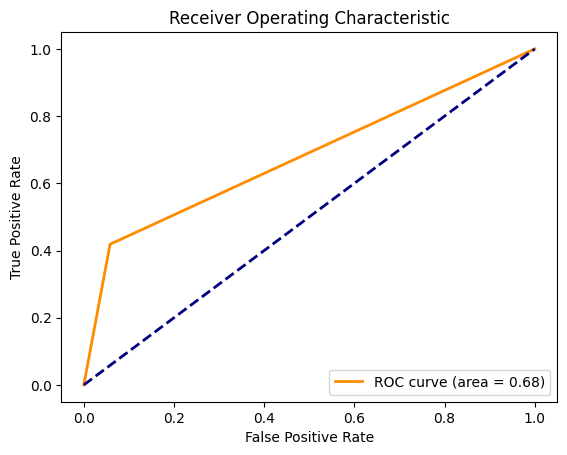

ROC AUC: 0.6802114164904862


In [22]:
def plot_roc_curve(y_test: np.ndarray, y_probs: np.ndarray) -> float:
    
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

input = "label"
best_k, test_accuracy, conf_matrix, class_report, y_test, y_probs = KNN_with_oversampling(input)

print(f"Optimal k: {best_k}")
print(f"Test Accuracy: {test_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

roc_auc = plot_roc_curve(y_test, y_probs)
print(f"ROC AUC: {roc_auc}")

In [24]:
def train_evaluate_svm(sorted_df: pd.DataFrame, target_column: str = 'label') -> None:
    X = sorted_df.drop(['Ind_ID', target_column], axis=1)
    y = sorted_df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    classifier = SVC(kernel='linear', random_state=42)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_rep)
train_evaluate_svm(sorted_df)

Accuracy: 0.8585
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       275
           1       0.00      0.00      0.00        43

    accuracy                           0.86       318
   macro avg       0.43      0.50      0.46       318
weighted avg       0.75      0.86      0.80       318



# Outlier Detection
Outlier detection is finding points that have extreme values compared to most of the dataset. It is important in detecting fraud or cybersecurity attacks, but also for knowing what data to filter out so that the model is trained on data that makes sense. The 3 common methods for outlier detection are box plots (uses quartiles and medians), isolation forests (uses data partitions and multiple factors to determine if a point is an outlier) and OneClassSVM. The last two are unsupervised ML models that work best with larger datasets.